In [18]:
import tensorflow as tf
import random
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#pip install tqdm
from tqdm import tqdm
from tensorflow.examples.tutorials.mnist import input_data

In [112]:
#어제 과제 mnist 텐서플로 사용해서 정확도 90퍼 이상올리기
#재비어 사용으로 정확도 올리기 실습
mnist=input_data.read_data_sets("MNIST_data/",one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [113]:
trainingEpochs=15
batch_size=100

In [114]:
x=tf.placeholder(tf.float32,[None,28*28])
y=tf.placeholder(tf.float32,[None,10])

In [11]:
w1=tf.get_variable("w1",shape=[784,256], initializer=tf.contrib.layers.xavier_initializer())
b1=tf.Variable(tf.random_normal([256]))
l1=tf.nn.relu(tf.matmul(x,w1)+b1)
# w설정 _ 재비어 w 초기화 알고리즘 선언
w2=tf.get_variable("w2",shape=[256,256], initializer=tf.contrib.layers.xavier_initializer())
b2=tf.Variable(tf.random_normal([256]))
l2=tf.nn.relu(tf.matmul(l1,w2)+b2)Q

w3=tf.get_variable("w3",shape=[256,256], initializer=tf.contrib.layers.xavier_initializer())
b3=tf.Variable(tf.random_normal([256]))
l3=tf.nn.relu(tf.matmul(l2,w3)+b3)

w4=tf.get_variable("w4",shape=[256,256], initializer=tf.contrib.layers.xavier_initializer())
b4=tf.Variable(tf.random_normal([256]))
l4=tf.nn.relu(tf.matmul(l3,w4)+b4)

w5=tf.get_variable("w5",shape=[256,10], initializer=tf.contrib.layers.xavier_initializer())
b5=tf.Variable(tf.random_normal([10]))

hf=tf.matmul(l4,w5)+b5

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.



In [ ]:
w1=tf.get_variable("w1",shape=[784,256], initializer=tf.contrib.layers.xavier_initializer())
b1=tf.Variable(tf.random_normal([256]))
l1=tf.nn.relu(tf.matmul(x,w1)+b1)
# w설정 _ 재비어 w 초기화 알고리즘 선언
w2=tf.get_variable("w2",shape=[256,256], initializer=tf.contrib.layers.xavier_initializer())
b2=tf.Variable(tf.random_normal([256]))
l2=tf.nn.relu(tf.matmul(l1,w2)+b2)Q

w3=tf.get_variable("w3",shape=[256,256], initializer=tf.contrib.layers.xavier_initializer())
b3=tf.Variable(tf.random_normal([256]))
l3=tf.nn.relu(tf.matmul(l2,w3)+b3)

w4=tf.get_variable("w4",shape=[256,256], initializer=tf.contrib.layers.xavier_initializer())
b4=tf.Variable(tf.random_normal([256]))
l4=tf.nn.relu(tf.matmul(l3,w4)+b4)

w5=tf.get_variable("w5",shape=[256,10], initializer=tf.contrib.layers.xavier_initializer())
b5=tf.Variable(tf.random_normal([10]))

hf=tf.matmul(l4,w5)+b5

In [12]:
#재비어
# np.random.randn(입력노드수,출력노드수)
# /np.sqrt(입력노드수)
#tf.contrib.layers.xavier_initializer()

#he
# np.random.randn(입력노드수,출력노드수)
# / np.sqrt(입력노드수/2)
#tf.keras.initializers.he_normal()

In [13]:
cost=tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=hf, labels=y))
optimizer=tf.train.AdamOptimizer(0.001).minimize(cost)
prediction=tf.equal(tf.argmax(hf,1),tf.argmax(y,1))
accuracy=tf.reduce_mean(tf.cast(prediction,tf.float32))
#가중치 업데이트 방법
"""
-전통적 경사하강법은 매번 미분함 => 속도 느림
-확률적 경사하강법(sgd)=>속도 개선
-모멘텀(momentum) sgd => 확률적 경사하강법 + 관성
-아다그리드 => step size 개선
-rmsprop :아다그리드 개선
-아담(Adam) : 모멘텀 + rmsprop
"""

'\n-전통적 경사하강법은 매번 미분함 => 속도 느림\n-확률적 경사하강법(sgd)=>속도 개선\n-모멘텀(momentum) sgd => 확률적 경사하강법 + 관성\n-아다그리드 => step size 개선\n-rmsprop :아다그리드 개선\n-아담(Adam) : 모멘텀 + rmsprop\n'

In [14]:
sess=tf.Session()
sess.run(tf.global_variables_initializer())
for epoch in range(trainingEpochs):
    avgCost=0
    totalBatch=int(mnist.train.num_examples/batch_size)
    
    pbar=tqdm(range(totalBatch))    
    for i in pbar:  #in range(totalBatch):
        batchX,batchY=mnist.train.next_batch(batch_size)
        cv,_=sess.run([cost,optimizer],feed_dict={x:batchX,y:batchY})
        # feed_dict={x:batchX,y:batchY,keep_prob:0.7}로 모델링 하면 성능 더 상승,
        # 테스트는 1로?
        avgCost+=cv/totalBatch
        pbar.set_description("cost:%f" % avgCost)
print("정확도:",sess.run(accuracy,feed_dict={x:mnist.test.images, y:mnist.test.labels}))
    

cost:0.013853: 100%|████████████████████████████████████████████████████████████████| 550/550 [00:02<00:00, 194.83it/s]


정확도: 0.9757


In [ ]:
#재비어 대신 he 함수로 사용해보기
w1=tf.get_variable("w1",shape=[784,256], initializer=tf.keras.initializers.he_normal())
b1=tf.Variable(tf.random_normal([256]))
l1=tf.nn.relu(tf.matmul(x,w1)+b1)
# w설정 _ 재비어 w 초기화 알고리즘 선언
w2=tf.get_variable("w2",shape=[256,256], initializer=tf.keras.initializers.he_normal())
b2=tf.Variable(tf.random_normal([256]))
l2=tf.nn.relu(tf.matmul(l1,w2)+b2)

w3=tf.get_variable("w3",shape=[256,256], initializer=tf.keras.initializers.he_normal())
b3=tf.Variable(tf.random_normal([256]))
l3=tf.nn.relu(tf.matmul(l2,w3)+b3)

w4=tf.get_variable("w4",shape=[256,256], initializer=tf.keras.initializers.he_normal())
b4=tf.Variable(tf.random_normal([256]))
l4=tf.nn.relu(tf.matmul(l3,w4)+b4)

w5=tf.get_variable("w5",shape=[256,10], initializer=tf.keras.initializers.he_normal())
b5=tf.Variable(tf.random_normal([10]))

hf=tf.matmul(l4,w5)+b5

      label  predict
151       9        8
247       4        6
290       8        9
320       9        7
321       2        7
...     ...      ...
9808      9        4
9858      6        8
9904      2        6
9905      3        8
9944      3        8

[243 rows x 2 columns]


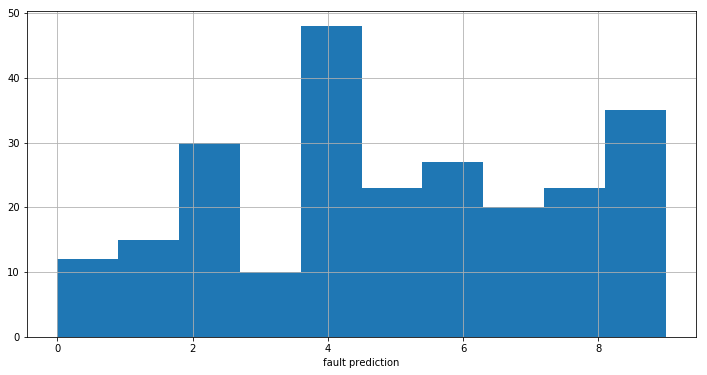

In [19]:
index=[]
ori=[]
pred=[]
labels=sess.run(tf.argmax(mnist.test.labels,1))
predictions=sess.run(tf.argmax(hf,1),feed_dict={x:mnist.test.images})
for i in range(0,mnist.test.num_examples):
    if predictions[i] != labels[i]:
        index.append(i)
        ori.append(labels[i])
        pred.append(predictions[i])
res=pd.DataFrame({"label":ori,"predict":pred},index=index)
print(res)
plt.figure(figsize=(12,6))
plt.hist(res['predict'],bins=10)
plt.xlabel('fault prediction')
plt.grid()
plt.show()

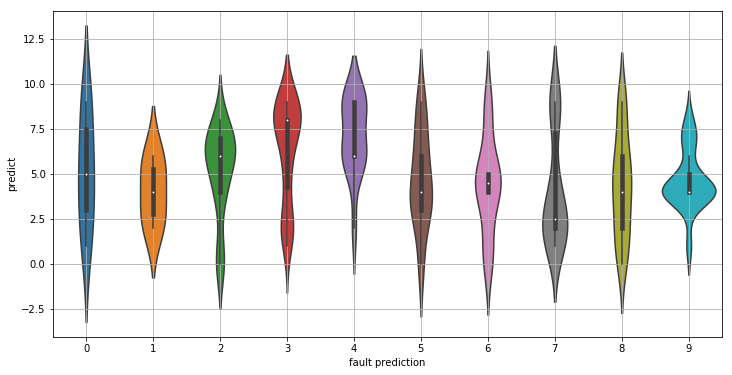

In [20]:
import seaborn as sns
plt.figure(figsize=(12,6))
sns.violinplot(x='label',y='predict',data=res)
plt.xlabel('fault prediction')
plt.grid()
plt.show()

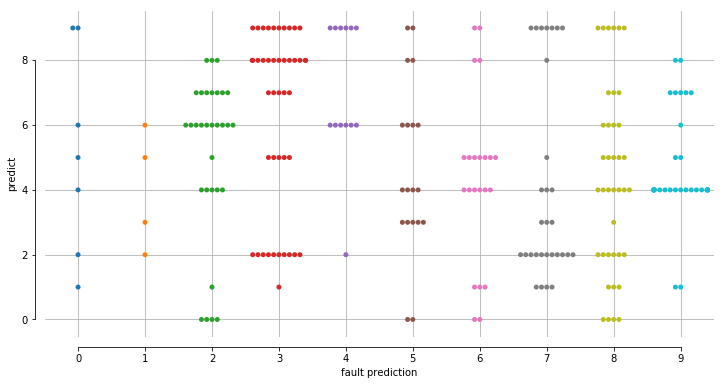

In [21]:
plt.figure(figsize=(12,6))
sns.swarmplot(x='label',y='predict',data=res)
sns.despine(offset=10,trim=True)
plt.xlabel('fault prediction')
plt.grid()
plt.show()

In [22]:
ver=res.query("label==4").sample(n=8).index

In [23]:
ver

Int64Index([3780, 3941, 5936, 1242, 2053, 1549, 5201, 5676], dtype='int64')

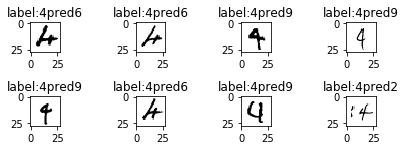

In [31]:
cnt=0
for n in ver:
    cnt+=1
    plt.subplot(4,4,cnt)
    plt.imshow(mnist.test.images[n].reshape(28,28),cmap='Greys')
    t="label:"+str(res['label'][n])+"pred"+str(res['predict'][n])
    plt.title(t)
plt.tight_layout()#여백
plt.show()

In [33]:
###케라스 인디안 분석
from keras.models import Sequential
from keras.layers import Dense
import numpy as np

Using TensorFlow backend.


In [34]:
#seed생성
np.random.seed(42)
tf.set_random_seed(42)

In [43]:
data=np.loadtxt("C:/Users/student/Downloads/Python_JP/dataset (1)/pima-indians-diabetes.csv",delimiter=",")

In [44]:
x=data[:,0:8]
y=data[:,8]

In [45]:
model=Sequential()
model.add(Dense(12,input_dim=8,activation='relu'))
model.add(Dense(8,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [46]:
model.compile(loss="binary_crossentropy",optimizer='adam',metrics=['accuracy'])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [47]:
model.fit(x,y,epochs=200,batch_size=10)




Epoch 1/200
768/768 [==============================] - ETA: 23s - loss: 23.9541 - accuracy: 0.40 - ETA: 0s - loss: 16.9679 - accuracy: 0.3460 - 0s 499us/step - loss: 12.5036 - accuracy: 0.3581
Epoch 2/200
768/768 [==============================] - ETA: 0s - loss: 2.8432 - accuracy: 0.40 - ETA: 0s - loss: 1.7549 - accuracy: 0.53 - 0s 96us/step - loss: 1.6192 - accuracy: 0.5443
Epoch 3/200
768/768 [==============================] - ETA: 0s - loss: 1.3719 - accuracy: 0.60 - ETA: 0s - loss: 1.1694 - accuracy: 0.59 - 0s 91us/step - loss: 1.1511 - accuracy: 0.6042
Epoch 4/200
768/768 [==============================] - ETA: 0s - loss: 0.7037 - accuracy: 0.50 - ETA: 0s - loss: 1.0970 - accuracy: 0.59 - 0s 96us/step - loss: 1.0524 - accuracy: 0.5964
Epoch 5/200
768/768 [==============================] - ETA: 0s - loss: 0.9600 - accuracy: 0.40 - ETA: 0s - loss: 1.0036 - accuracy: 0.59 - 0s 91us/step - loss: 0.9565 - accuracy: 0.5964
Epoch 6/200
768/768 [==============================] - ETA: 

768/768 [==============================] - ETA: 0s - loss: 0.5156 - accuracy: 0.70 - ETA: 0s - loss: 0.5539 - accuracy: 0.73 - 0s 96us/step - loss: 0.5582 - accuracy: 0.7240
Epoch 42/200
768/768 [==============================] - ETA: 0s - loss: 0.5797 - accuracy: 0.70 - ETA: 0s - loss: 0.5767 - accuracy: 0.70 - 0s 87us/step - loss: 0.5843 - accuracy: 0.7005
Epoch 43/200
768/768 [==============================] - ETA: 0s - loss: 0.3498 - accuracy: 0.90 - ETA: 0s - loss: 0.5799 - accuracy: 0.71 - 0s 85us/step - loss: 0.5762 - accuracy: 0.7161
Epoch 44/200
768/768 [==============================] - ETA: 0s - loss: 0.6702 - accuracy: 0.70 - ETA: 0s - loss: 0.5920 - accuracy: 0.70 - 0s 85us/step - loss: 0.5887 - accuracy: 0.7109
Epoch 45/200
768/768 [==============================] - ETA: 0s - loss: 0.7606 - accuracy: 0.60 - ETA: 0s - loss: 0.5849 - accuracy: 0.72 - 0s 86us/step - loss: 0.5658 - accuracy: 0.7292
Epoch 46/200
768/768 [==============================] - ETA: 0s - loss: 0.5214

Epoch 85/200
768/768 [==============================] - ETA: 0s - loss: 0.4947 - accuracy: 0.60 - ETA: 0s - loss: 0.5186 - accuracy: 0.74 - 0s 89us/step - loss: 0.5232 - accuracy: 0.7396
Epoch 86/200
768/768 [==============================] - ETA: 0s - loss: 0.2889 - accuracy: 0.90 - ETA: 0s - loss: 0.5148 - accuracy: 0.74 - 0s 90us/step - loss: 0.5162 - accuracy: 0.7461
Epoch 87/200
768/768 [==============================] - ETA: 0s - loss: 0.2527 - accuracy: 1.00 - ETA: 0s - loss: 0.5484 - accuracy: 0.74 - 0s 91us/step - loss: 0.5400 - accuracy: 0.7435
Epoch 88/200
768/768 [==============================] - ETA: 0s - loss: 0.3078 - accuracy: 0.90 - ETA: 0s - loss: 0.5238 - accuracy: 0.74 - 0s 89us/step - loss: 0.5257 - accuracy: 0.7500
Epoch 89/200
768/768 [==============================] - ETA: 0s - loss: 0.3055 - accuracy: 0.90 - ETA: 0s - loss: 0.5454 - accuracy: 0.72 - 0s 87us/step - loss: 0.5377 - accuracy: 0.7214
Epoch 90/200
768/768 [==============================] - ETA: 0s -

768/768 [==============================] - ETA: 0s - loss: 0.3498 - accuracy: 0.90 - ETA: 0s - loss: 0.4994 - accuracy: 0.77 - 0s 89us/step - loss: 0.4989 - accuracy: 0.7643
Epoch 129/200
768/768 [==============================] - ETA: 0s - loss: 0.2321 - accuracy: 0.90 - ETA: 0s - loss: 0.4801 - accuracy: 0.78 - 0s 90us/step - loss: 0.4945 - accuracy: 0.7734
Epoch 130/200
768/768 [==============================] - ETA: 0s - loss: 0.5023 - accuracy: 0.60 - ETA: 0s - loss: 0.5141 - accuracy: 0.74 - 0s 85us/step - loss: 0.5147 - accuracy: 0.7461
Epoch 131/200
768/768 [==============================] - ETA: 0s - loss: 0.5084 - accuracy: 0.60 - ETA: 0s - loss: 0.4964 - accuracy: 0.76 - 0s 92us/step - loss: 0.4982 - accuracy: 0.7617
Epoch 132/200
768/768 [==============================] - ETA: 0s - loss: 0.5074 - accuracy: 0.70 - ETA: 0s - loss: 0.4886 - accuracy: 0.75 - 0s 92us/step - loss: 0.4946 - accuracy: 0.7617
Epoch 133/200
768/768 [==============================] - ETA: 0s - loss: 0

768/768 [==============================] - ETA: 0s - loss: 0.3185 - accuracy: 0.90 - ETA: 0s - loss: 0.4833 - accuracy: 0.76 - 0s 90us/step - loss: 0.4892 - accuracy: 0.7695
Epoch 172/200
768/768 [==============================] - ETA: 0s - loss: 0.5656 - accuracy: 0.70 - ETA: 0s - loss: 0.5037 - accuracy: 0.74 - 0s 94us/step - loss: 0.4978 - accuracy: 0.7539
Epoch 173/200
768/768 [==============================] - ETA: 0s - loss: 0.4386 - accuracy: 0.80 - ETA: 0s - loss: 0.5136 - accuracy: 0.75 - 0s 91us/step - loss: 0.4997 - accuracy: 0.7630
Epoch 174/200
768/768 [==============================] - ETA: 0s - loss: 0.4903 - accuracy: 0.80 - ETA: 0s - loss: 0.4954 - accuracy: 0.74 - 0s 92us/step - loss: 0.4978 - accuracy: 0.7435
Epoch 175/200
768/768 [==============================] - ETA: 0s - loss: 0.5019 - accuracy: 0.70 - ETA: 0s - loss: 0.4991 - accuracy: 0.75 - 0s 95us/step - loss: 0.4908 - accuracy: 0.7643
Epoch 176/200
768/768 [==============================] - ETA: 0s - loss: 0

In [49]:
model.evaluate(x,y)

768/768 [==============================] - ETA:  - 0s 16us/step


[0.46710143486658734, 0.7825520634651184]

In [50]:
from keras.datasets import mnist
(trainImage,trainLabel),(testImage,testLabel)=mnist.load_data()

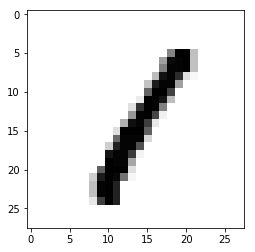

In [51]:
digit=trainImage[3]
plt.imshow(digit,cmap=plt.cm.binary)
plt.show()

In [52]:
model2=Sequential()
model2.add(Dense(512,input_shape=(28*28,),activation='relu'))
model2.add(Dense(10,activation='softmax'))

In [53]:
model2.compile(loss='categorical_crossentropy',
               optimizer='rmsprop',
               metrics=['accuracy'])

In [54]:
trainImage=trainImage.reshape((60000,28*28))
trainImage=trainImage.astype('float32')/255
testImage=testImage.reshape((10000,28*28))
testImage=testImage.astype('float32')/255

In [55]:
trainLabel#원 핫 인코딩 아직 안돼있는 상태!
#범주형 형태의 원핫 필요함

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [56]:
from keras.utils import to_categorical
trainLabel=to_categorical(trainLabel)
testLabel=to_categorical(testLabel)

In [57]:
model2.fit(trainImage,trainLabel,epochs=5,batch_size=128)
#batch_size는 보통 2의 n승으로 주는 것이 좋음
#다른 연산 사이즈 2의 n이 유리

Epoch 1/5
60000/60000 [==============================] - ETA: 44s - loss: 2.3178 - accuracy: 0.085 - ETA: 8s - loss: 1.3417 - accuracy: 0.574 - ETA: 5s - loss: 1.0123 - accuracy: 0.70 - ETA: 4s - loss: 0.8436 - accuracy: 0.75 - ETA: 4s - loss: 0.7463 - accuracy: 0.78 - ETA: 3s - loss: 0.6785 - accuracy: 0.80 - ETA: 3s - loss: 0.6310 - accuracy: 0.82 - ETA: 3s - loss: 0.5981 - accuracy: 0.82 - ETA: 3s - loss: 0.5701 - accuracy: 0.83 - ETA: 3s - loss: 0.5465 - accuracy: 0.84 - ETA: 3s - loss: 0.5208 - accuracy: 0.85 - ETA: 2s - loss: 0.5019 - accuracy: 0.85 - ETA: 2s - loss: 0.4846 - accuracy: 0.85 - ETA: 2s - loss: 0.4709 - accuracy: 0.86 - ETA: 2s - loss: 0.4596 - accuracy: 0.86 - ETA: 2s - loss: 0.4460 - accuracy: 0.87 - ETA: 2s - loss: 0.4357 - accuracy: 0.87 - ETA: 2s - loss: 0.4247 - accuracy: 0.87 - ETA: 2s - loss: 0.4117 - accuracy: 0.88 - ETA: 2s - loss: 0.4038 - accuracy: 0.88 - ETA: 2s - loss: 0.3955 - accuracy: 0.88 - ETA: 2s - loss: 0.3859 - accuracy: 0.88 - ETA: 2s - loss: 

60000/60000 [==============================] - ETA: 4s - loss: 0.0326 - accuracy: 0.99 - ETA: 3s - loss: 0.0403 - accuracy: 0.98 - ETA: 3s - loss: 0.0475 - accuracy: 0.98 - ETA: 3s - loss: 0.0442 - accuracy: 0.98 - ETA: 2s - loss: 0.0430 - accuracy: 0.98 - ETA: 2s - loss: 0.0453 - accuracy: 0.98 - ETA: 2s - loss: 0.0462 - accuracy: 0.98 - ETA: 2s - loss: 0.0455 - accuracy: 0.98 - ETA: 2s - loss: 0.0438 - accuracy: 0.98 - ETA: 2s - loss: 0.0442 - accuracy: 0.98 - ETA: 2s - loss: 0.0465 - accuracy: 0.98 - ETA: 2s - loss: 0.0461 - accuracy: 0.98 - ETA: 2s - loss: 0.0460 - accuracy: 0.98 - ETA: 2s - loss: 0.0472 - accuracy: 0.98 - ETA: 2s - loss: 0.0470 - accuracy: 0.98 - ETA: 2s - loss: 0.0466 - accuracy: 0.98 - ETA: 2s - loss: 0.0461 - accuracy: 0.98 - ETA: 2s - loss: 0.0482 - accuracy: 0.98 - ETA: 2s - loss: 0.0484 - accuracy: 0.98 - ETA: 2s - loss: 0.0481 - accuracy: 0.98 - ETA: 2s - loss: 0.0486 - accuracy: 0.98 - ETA: 1s - loss: 0.0484 - accuracy: 0.98 - ETA: 1s - loss: 0.0489 - accu

In [59]:
l,a=model2.evaluate(testImage,testLabel)
a

10000/10000 [==============================] - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - 0s 40us/step


0.9786999821662903

In [60]:
"""
일반적(텐서플로) : 이미지(128, 높이, 너비, 3)
씨아노 : 이미지(128, 3, 높이, 너비)

비디오 : 5차원 텐서, 프레임(이미지)의 연속
(프레임, 높이, 너비, 채널)
ex) 60초 짜리, 100*200 유튜브 비디오, 초당 4프레임을 샘플링
4*60=240프레임
비디오 클립 5개
(프레임, 높이, 너비, 채널)
(5, 240, 100, 200, 3)

"""

'\n일반적(텐서플로) : 이미지(128, 높이, 너비, 3)\n씨아노 : 이미지(128, 3, 높이, 너비)\n\n비디오 : 5차원 텐서, 프레임(이미지)의 연속\n(프레임, 높이, 너비, 채널)\nex) 60초 짜리, 100*200 유튜브 비디오, 초당 4프레임을 샘플링\n4*60=240프레임\n비디오 클립 5개\n(프레임, 높이, 너비, 채널)\n(5, 240, 100, 200, 3)\n\n'

In [62]:
## 영화 리뷰 분류 데이터
from keras.datasets import imdb

In [64]:
(trainData,trainLabel),(testData,testLabel)=imdb.load_data(num_words=10000)
# 자주 사용된 10000개 단어만 추출 사용

17309696/17464789 [============================>.] - ETA:  - ETA: 2: - ETA: 2: - ETA: 1: - ETA: 44s - ETA: 51 - ETA: 51 - ETA: 46 - ETA: 39 - ETA: 37 - ETA: 42 - ETA: 38 - ETA: 39 - ETA: 39 - ETA: 40 - ETA: 38 - ETA: 43 - ETA: 41 - ETA: 42 - ETA: 41 - ETA: 42 - ETA: 43 - ETA: 43 - ETA: 44 - ETA: 43 - ETA: 44 - ETA: 43 - ETA: 44 - ETA: 43 - ETA: 44 - ETA: 44 - ETA: 46 - ETA: 46 - ETA: 46 - ETA: 45 - ETA: 46 - ETA: 46 - ETA: 46 - ETA: 48 - ETA: 49 - ETA: 48 - ETA: 49 - ETA: 49 - ETA: 49 - ETA: 51 - ETA: 51 - ETA: 51 - ETA: 51 - ETA: 51 - ETA: 52 - ETA: 52 - ETA: 52 - ETA: 54 - ETA: 54 - ETA: 54 - ETA: 54 - ETA: 55 - ETA: 57 - ETA: 57 - ETA: 57 - ETA: 57 - ETA: 58 - ETA: 59 - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: 

17465344/17464789 [==============================] - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - 194s 11us/step


In [65]:
trainData

array([list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]),
       list([1, 194, 1153, 194, 8255, 78, 228,

In [66]:
trainData.shape # ( 25000, ) 약 25000개의 리뷰 존재

(25000,)

In [71]:
len(trainData[0]) # 218개의 단어로 구성됨
trainLabel[0] # 1 긍정 리뷰

1

In [74]:
trainData # 각각 단어 1개의 번호들

array([list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]),
       list([1, 194, 1153, 194, 8255, 78, 228,

In [81]:
# print([len(seq) for seq in trainData]) # 각 리뷰에 단어 사용 개수
print(max([max(seq) for seq in trainData]))

9999


In [79]:
wordIndex=imdb.get_word_index()
wordIndex

1646592/1641221 [==============================] - ETA:  - ETA: 15 - ETA: 18 - ETA: 29 - ETA: 24 - ETA: 24 - ETA: 31 - ETA: 28 - ETA: 30 - ETA: 35 - ETA: 34 - ETA: 35 - ETA: 35 - ETA: 35 - ETA: 35 - ETA: 35 - ETA: 34 - ETA: 32 - ETA: 33 - ETA: 33 - ETA: 33 - ETA: 32 - ETA: 32 - ETA: 31 - ETA: 30 - ETA: 31 - ETA: 30 - ETA: 29 - ETA: 30 - ETA: 30 - ETA: 30 - ETA: 30 - ETA: 28 - ETA: 29 - ETA: 29 - ETA: 28 - ETA: 28 - ETA: 27 - ETA: 27 - ETA: 26 - ETA: 26 - ETA: 25 - ETA: 24 - ETA: 24 - ETA: 23 - ETA: 23 - ETA: 23 - ETA: 22 - ETA: 21 - ETA: 20 - ETA: 20 - ETA: 19 - ETA: 19 - ETA: 19 - ETA: 18 - ETA: 18 - ETA: 18 - ETA: 17 - ETA: 17 - ETA: 17 - ETA: 16 - ETA: 16 - ETA: 16 - ETA: 15 - ETA: 15 - ETA: 14 - ETA: 14 - ETA: 13 - ETA: 13 - ETA: 12 - ETA: 12 - ETA: 11 - ETA: 11 - ETA: 10 - ETA: 10 - ETA: 10 - ETA: 9 - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - 49s 30us/step


{'fawn': 34701,
 'tsukino': 52006,
 'nunnery': 52007,
 'sonja': 16816,
 'vani': 63951,
 'woods': 1408,
 'spiders': 16115,
 'hanging': 2345,
 'woody': 2289,
 'trawling': 52008,
 "hold's": 52009,
 'comically': 11307,
 'localized': 40830,
 'disobeying': 30568,
 "'royale": 52010,
 "harpo's": 40831,
 'canet': 52011,
 'aileen': 19313,
 'acurately': 52012,
 "diplomat's": 52013,
 'rickman': 25242,
 'arranged': 6746,
 'rumbustious': 52014,
 'familiarness': 52015,
 "spider'": 52016,
 'hahahah': 68804,
 "wood'": 52017,
 'transvestism': 40833,
 "hangin'": 34702,
 'bringing': 2338,
 'seamier': 40834,
 'wooded': 34703,
 'bravora': 52018,
 'grueling': 16817,
 'wooden': 1636,
 'wednesday': 16818,
 "'prix": 52019,
 'altagracia': 34704,
 'circuitry': 52020,
 'crotch': 11585,
 'busybody': 57766,
 "tart'n'tangy": 52021,
 'burgade': 14129,
 'thrace': 52023,
 "tom's": 11038,
 'snuggles': 52025,
 'francesco': 29114,
 'complainers': 52027,
 'templarios': 52125,
 '272': 40835,
 '273': 52028,
 'zaniacs': 52130,

In [84]:
rev_wordIndex=dict([(value,key) for (key,value) in wordIndex.items()])

In [85]:
rev_wordIndex

{34701: 'fawn',
 52006: 'tsukino',
 52007: 'nunnery',
 16816: 'sonja',
 63951: 'vani',
 1408: 'woods',
 16115: 'spiders',
 2345: 'hanging',
 2289: 'woody',
 52008: 'trawling',
 52009: "hold's",
 11307: 'comically',
 40830: 'localized',
 30568: 'disobeying',
 52010: "'royale",
 40831: "harpo's",
 52011: 'canet',
 19313: 'aileen',
 52012: 'acurately',
 52013: "diplomat's",
 25242: 'rickman',
 6746: 'arranged',
 52014: 'rumbustious',
 52015: 'familiarness',
 52016: "spider'",
 68804: 'hahahah',
 52017: "wood'",
 40833: 'transvestism',
 34702: "hangin'",
 2338: 'bringing',
 40834: 'seamier',
 34703: 'wooded',
 52018: 'bravora',
 16817: 'grueling',
 1636: 'wooden',
 16818: 'wednesday',
 52019: "'prix",
 34704: 'altagracia',
 52020: 'circuitry',
 11585: 'crotch',
 57766: 'busybody',
 52021: "tart'n'tangy",
 14129: 'burgade',
 52023: 'thrace',
 11038: "tom's",
 52025: 'snuggles',
 29114: 'francesco',
 52027: 'complainers',
 52125: 'templarios',
 40835: '272',
 52028: '273',
 52130: 'zaniacs',

In [88]:
# i가 0, 1, 2, 3 일때는 "?"를 get
# 즉, 불필요한 단어들은 뺏다!?
decReview=" ".join([rev_wordIndex.get(i-3,"?") for i in trainData[0]])
#get(9999,"?") 9999키 존재하면 그에 해당 value 출력 아니면 ?출력

In [89]:
# 동일한 길이의 리스트가 되도록 패딩 작업수행
# 원핫인코딩

In [90]:
def vec_seq(data,dim=10000):
    res=np.zeros((len(data),dim))
    for i,s in enumerate(data):
        res[i,s]=1
    return res
xTrain=vec_seq(trainData)
xTest=vec_seq(testData)
    #훈련데이터 -> 벡터로 변환

In [91]:
xTrain[0] # xTrain.shape 25000,10000 

array([0., 1., 1., ..., 0., 0., 0.])

In [92]:
xTest[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [94]:
yTrain=trainLabel.astype('float32')
yTest=testLabel.astype('float32')

In [95]:
yTest.shape

(25000,)

In [98]:
# 신경망 모델
model=Sequential()
model.add(Dense(16,activation='relu',input_shape=(10000,)))
model.add(Dense(16,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [99]:
model.compile(loss='binary_crossentropy',
             optimizer='rmsprop',
             metrics=['accuracy'])
#이진분류는 binary_cros., 다중 분류는 categorical_cros..

In [100]:
xVal=xTrain[:10000]
p_xTrain=xTrain[10000:]
yVal=yTrain[:10000]
p_yTrain=yTrain[10000:]

In [101]:
history=model.fit(p_xTrain,p_yTrain,epochs=20,batch_size=512,
                  validation_data=(xVal,yVal))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - ETA: 5s - loss: 0.6904 - accuracy: 0.53 - ETA: 3s - loss: 0.6824 - accuracy: 0.58 - ETA: 2s - loss: 0.6706 - accuracy: 0.63 - ETA: 2s - loss: 0.6635 - accuracy: 0.63 - ETA: 2s - loss: 0.6600 - accuracy: 0.63 - ETA: 1s - loss: 0.6528 - accuracy: 0.63 - ETA: 1s - loss: 0.6432 - accuracy: 0.66 - ETA: 1s - loss: 0.6361 - accuracy: 0.67 - ETA: 1s - loss: 0.6291 - accuracy: 0.68 - ETA: 1s - loss: 0.6223 - accuracy: 0.69 - ETA: 1s - loss: 0.6154 - accuracy: 0.70 - ETA: 1s - loss: 0.6063 - accuracy: 0.71 - ETA: 1s - loss: 0.5999 - accuracy: 0.72 - ETA: 1s - loss: 0.5928 - accuracy: 0.73 - ETA: 1s - loss: 0.5873 - accuracy: 0.73 - ETA: 0s - loss: 0.5811 - accuracy: 0.74 - ETA: 0s - loss: 0.5747 - accuracy: 0.74 - ETA: 0s - loss: 0.5689 - accuracy: 0.75 - ETA: 0s - loss: 0.5633 - accuracy: 0.75 - ETA: 0s - loss: 0.5577 - accuracy: 0.76 - ETA: 0s - loss: 0.5513 - accuracy: 0.76 - ETA: 0s - 

Epoch 7/20
15000/15000 [==============================] - ETA: 1s - loss: 0.0778 - accuracy: 0.98 - ETA: 1s - loss: 0.0862 - accuracy: 0.97 - ETA: 1s - loss: 0.0810 - accuracy: 0.98 - ETA: 1s - loss: 0.0792 - accuracy: 0.98 - ETA: 1s - loss: 0.0778 - accuracy: 0.98 - ETA: 1s - loss: 0.0816 - accuracy: 0.98 - ETA: 1s - loss: 0.0820 - accuracy: 0.98 - ETA: 1s - loss: 0.0845 - accuracy: 0.97 - ETA: 1s - loss: 0.0895 - accuracy: 0.97 - ETA: 1s - loss: 0.0898 - accuracy: 0.97 - ETA: 1s - loss: 0.0914 - accuracy: 0.97 - ETA: 0s - loss: 0.0946 - accuracy: 0.97 - ETA: 0s - loss: 0.0947 - accuracy: 0.97 - ETA: 0s - loss: 0.0948 - accuracy: 0.97 - ETA: 0s - loss: 0.0945 - accuracy: 0.97 - ETA: 0s - loss: 0.0950 - accuracy: 0.97 - ETA: 0s - loss: 0.0953 - accuracy: 0.97 - ETA: 0s - loss: 0.0948 - accuracy: 0.97 - ETA: 0s - loss: 0.0950 - accuracy: 0.97 - ETA: 0s - loss: 0.0951 - accuracy: 0.97 - ETA: 0s - loss: 0.0956 - accuracy: 0.97 - ETA: 0s - loss: 0.0962 - accuracy: 0.97 - ETA: 0s - loss: 0.

Epoch 13/20
15000/15000 [==============================] - ETA: 1s - loss: 0.0306 - accuracy: 0.99 - ETA: 1s - loss: 0.0254 - accuracy: 0.99 - ETA: 1s - loss: 0.0278 - accuracy: 0.99 - ETA: 1s - loss: 0.0262 - accuracy: 0.99 - ETA: 1s - loss: 0.0255 - accuracy: 0.99 - ETA: 1s - loss: 0.0260 - accuracy: 0.99 - ETA: 1s - loss: 0.0270 - accuracy: 0.99 - ETA: 1s - loss: 0.0277 - accuracy: 0.99 - ETA: 1s - loss: 0.0275 - accuracy: 0.99 - ETA: 1s - loss: 0.0274 - accuracy: 0.99 - ETA: 0s - loss: 0.0276 - accuracy: 0.99 - ETA: 0s - loss: 0.0271 - accuracy: 0.99 - ETA: 0s - loss: 0.0271 - accuracy: 0.99 - ETA: 0s - loss: 0.0277 - accuracy: 0.99 - ETA: 0s - loss: 0.0279 - accuracy: 0.99 - ETA: 0s - loss: 0.0281 - accuracy: 0.99 - ETA: 0s - loss: 0.0283 - accuracy: 0.99 - ETA: 0s - loss: 0.0288 - accuracy: 0.99 - ETA: 0s - loss: 0.0288 - accuracy: 0.99 - ETA: 0s - loss: 0.0288 - accuracy: 0.99 - ETA: 0s - loss: 0.0288 - accuracy: 0.99 - ETA: 0s - loss: 0.0290 - accuracy: 0.99 - ETA: 0s - loss: 0

Epoch 19/20
15000/15000 [==============================] - ETA: 1s - loss: 0.0064 - accuracy: 1.00 - ETA: 1s - loss: 0.0053 - accuracy: 1.00 - ETA: 1s - loss: 0.0052 - accuracy: 1.00 - ETA: 1s - loss: 0.0055 - accuracy: 1.00 - ETA: 1s - loss: 0.0053 - accuracy: 1.00 - ETA: 1s - loss: 0.0055 - accuracy: 1.00 - ETA: 1s - loss: 0.0053 - accuracy: 1.00 - ETA: 1s - loss: 0.0056 - accuracy: 0.99 - ETA: 1s - loss: 0.0061 - accuracy: 0.99 - ETA: 1s - loss: 0.0060 - accuracy: 0.99 - ETA: 0s - loss: 0.0060 - accuracy: 0.99 - ETA: 0s - loss: 0.0062 - accuracy: 0.99 - ETA: 0s - loss: 0.0062 - accuracy: 0.99 - ETA: 0s - loss: 0.0065 - accuracy: 0.99 - ETA: 0s - loss: 0.0065 - accuracy: 0.99 - ETA: 0s - loss: 0.0065 - accuracy: 0.99 - ETA: 0s - loss: 0.0064 - accuracy: 0.99 - ETA: 0s - loss: 0.0064 - accuracy: 0.99 - ETA: 0s - loss: 0.0064 - accuracy: 0.99 - ETA: 0s - loss: 0.0064 - accuracy: 0.99 - ETA: 0s - loss: 0.0064 - accuracy: 0.99 - ETA: 0s - loss: 0.0063 - accuracy: 0.99 - ETA: 0s - loss: 0

In [103]:
history.history.keys()

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])

In [104]:
historyDict=history.history

In [106]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

In [107]:
acc

[0.7932,
 0.9019333,
 0.92786664,
 0.94226664,
 0.9550667,
 0.9618667,
 0.96846664,
 0.9768,
 0.98113334,
 0.9844667,
 0.988,
 0.9921333,
 0.9934,
 0.99473333,
 0.9956667,
 0.99773335,
 0.9989333,
 0.9972,
 0.9986,
 0.99986666]

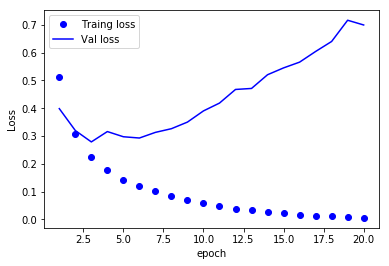

In [108]:
epo=range(1,len(acc)+1)
plt.plot(epo,loss,'bo',label='Traing loss')
plt.plot(epo,val_loss,'b',label='Val loss')
plt.xlabel("epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

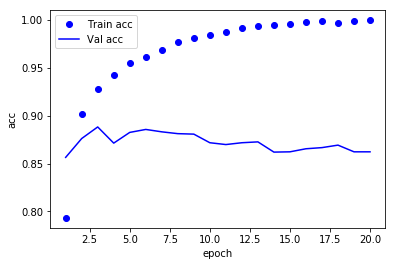

In [109]:
plt.plot(epo,acc,'bo',label="Train acc")
plt.plot(epo,val_acc,'b',label='Val acc')
plt.xlabel("epoch")
plt.ylabel("acc")
plt.legend()
plt.show()

In [110]:
model.evaluate(xTest,yTest)

25000/25000 [==============================] - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - 3s 130us/step


[0.7668838533973694, 0.8485999703407288]

In [111]:
model.predict(xTest)

array([[0.00452176],
       [1.        ],
       [0.9617934 ],
       ...,
       [0.00356573],
       [0.01140317],
       [0.40021524]], dtype=float32)

In [116]:
#문제!!
from keras.datasets import boston_housing
#70년대? 보스턴 주택가격 관련 데이터(범죄율 포함)

In [117]:
(trainData,trainTargets),(testData,testTargets)=boston_housing.load_data()

57344/57026 [==============================] - ETA:  - ETA:  - 0s 4us/step


In [122]:
trainData.shape # 404, 13
trainTargets
testData.shape# 102, 13
testTargets
# loss='mse', optimizer='rmsprop',metrics=['mae']평균절대오차
# ex) mae가 0.5 -> 실제와 예측 차이:0.5 -> 500달러

# 케라스, 텐서플로우 버전 각각 1개씩
# 아이리스 품종 분류기 : iris.csv 파일 사용
# 정확도 최대한 올리는 방향으로
# loss=categorical_crossentropy, optimizer=adm
# metrics=accuracy
# 케라스 텐서플로우 각각

array([ 7.2, 18.8, 19. , 27. , 22.2, 24.5, 31.2, 22.9, 20.5, 23.2, 18.6,
       14.5, 17.8, 50. , 20.8, 24.3, 24.2, 19.8, 19.1, 22.7, 12. , 10.2,
       20. , 18.5, 20.9, 23. , 27.5, 30.1,  9.5, 22. , 21.2, 14.1, 33.1,
       23.4, 20.1,  7.4, 15.4, 23.8, 20.1, 24.5, 33. , 28.4, 14.1, 46.7,
       32.5, 29.6, 28.4, 19.8, 20.2, 25. , 35.4, 20.3,  9.7, 14.5, 34.9,
       26.6,  7.2, 50. , 32.4, 21.6, 29.8, 13.1, 27.5, 21.2, 23.1, 21.9,
       13. , 23.2,  8.1,  5.6, 21.7, 29.6, 19.6,  7. , 26.4, 18.9, 20.9,
       28.1, 35.4, 10.2, 24.3, 43.1, 17.6, 15.4, 16.2, 27.1, 21.4, 21.5,
       22.4, 25. , 16.6, 18.6, 22. , 42.8, 35.1, 21.5, 36. , 21.9, 24.1,
       50. , 26.7, 25. ])